In [70]:
import yfinance as yf
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
#設定查詢日期
end_time = '2022-05-21'
start_time = '2022-03-12'
#S&P500指數
GSPC_df = yf.download('^GSPC', start_time, end_time).round(2)
GSPC_df.to_excel('S&P500_return.xlsx')
fund_df = pd.read_excel('fund_NAV.xlsx')

[*********************100%***********************]  1 of 1 completed


In [98]:
fund_df['Rate of Return(%)'] = fund_df['Rate of Return(%)']/100
fund_df.columns = ['Date', 'Net Asset Value', 'Rate of Return']

In [99]:
fund_df

,Date,Net Asset Value,Rate of Return
0,2022-03-14,9.316646e+07,-0.068335
1,2022-03-15,8.645662e+07,-0.072020
2,2022-03-16,8.289398e+07,-0.041207
3,2022-03-17,9.238012e+07,0.114437
4,2022-03-18,9.339881e+07,0.011027
5,2022-03-21,1.010731e+08,0.082167
6,2022-03-22,1.009214e+08,-0.001501
7,2022-03-23,1.044763e+08,0.035225
8,2022-03-24,1.040404e+08,-0.004172
9,2022-03-25,1.054743e+08,0.013782


In [100]:
GSPC_df = GSPC_df['Close']
price_change = GSPC_df.pct_change()
df = price_change.drop(price_change.index[0])

In [101]:
# x 為S&P500報酬率 y 為基金報酬率
x = np.array(df).reshape((-1,1))
y = np.array(fund_df['Rate of Return'])

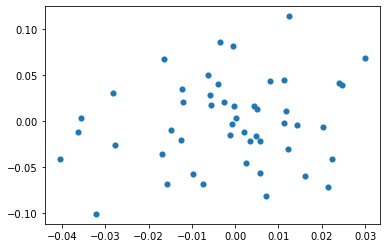

In [102]:
plt.scatter(x,y,linewidths=0.1)
plt.show()

In [103]:
reg = LinearRegression()
model = reg.fit(x, y)
predict = reg.predict(x)


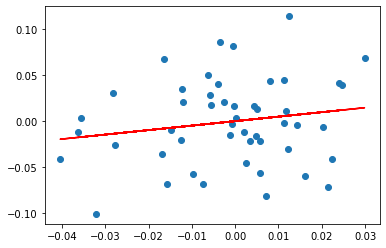

In [105]:
plt.plot(x,predict,c="red")
plt.scatter(x,y)
plt.show()

In [106]:
print('Beta = ', model.coef_)

Beta =  [0.48864019]
